<a href="https://colab.research.google.com/github/CiaraFarrellSETU/-SEM2---Data-Analytics-and-Algorithms/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ciara Farrell  
Student ID: C00294114   


To begin with I played around with using a CNN to recognise hand written numbers.  
Using https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_cnn/digits_recognition_cnn.ipynb .  
This is done with the use of tensor flow which is an open source programme that can be used in machine learning and can train and test machine learning models.  


To begin with I choose to use version 2 of tensorflow google colab is using.  
As it is used for building models and is compatiable with keras.   
Google Colab only has tensor flow 2


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Importing the needed libaries for this model and checking what version of python colab is using.  
Its using Python version: 3.10.12

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())

Python version: 3.10.12


Next tensorboard needs to be configured this is done by loading the TensorBoard notebook extension.  
Also any logs from previous runs of this model are cleared to make sure they don't interfer with the current running model.

In [ ]:

%load_ext tensorboard

!rm -rf ./.logs/


Loading the data.  
The train dataset has 60,000 images of hand drawn numbers ranging from 0 to 9.  
The test dataset has 10,000 numbers

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Printing the size and shape of the train and test data to ensure they match the size they are supossed to be.

In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


Saving the image parameters to the constants that will be used to reshape the data and for model traning.  
The image width and height are 28 are predefined earlier

In [ ]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


Viewing how the first image in the x train dataset looks like as a matrix of size 28x28.   
With colour bits ranging from 0 to 255

In [ ]:

pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


Printing the number that corresponds to the matrix above

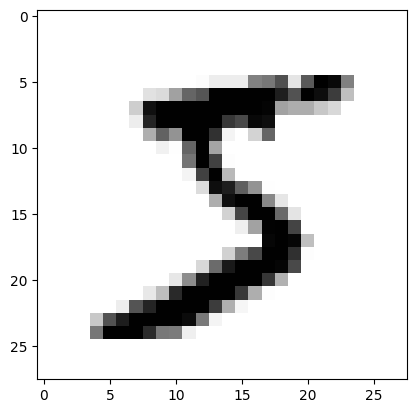

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Printing the first 15 numbers for the taining data set

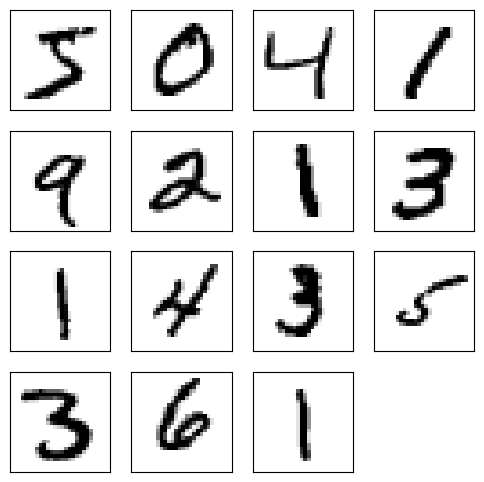

In [ ]:
numbers_to_display = 15
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(6,6))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

Now the data needs to be reshaped to allow for colour so indtead for a 28x28 matrix it now needs to be 28x28x1.  
The extra convolution layer represesnts the colours red,green,blue

In [ ]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

Checking the shape of the test and train datasets to ensure the extra layer was correctly added

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


Normalising the data is done to change from the range to 0 to 255, to a binary range of 0 to 1.  
This is done by dividing every value by 255

In [ ]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

Cheecking on the 15th image to see that the colour values have been normalized

In [ ]:
x_train_normalized[15]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Next the model must be built this is done using Sequential Keras.  
There are two layers Convolution2D and MaxPooling2D layers.   
For the Convolution2D layer the kernal size is set to 10 and 100 filters are applied taking a stride lenght of 1 across the image.  
For the MaxPooling2D layer the kernal size is set to 1 and 100 filters are applied taking a stride lenght of 1 across the image.  


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=10,
    filters=100,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=1,
    filters=100,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

Checking the model summary.  
By making the changes to the layer parameters the model now has 226,418 total parameters

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 19, 19, 100)       10100     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 9, 9, 100)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 9, 9, 100)         10100     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 100)         0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

Compling the model

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

Training the mode.   
I decided to use 100 epochs to training the neural network with all the training data for one cycle.

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=100,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/100
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0954 - accuracy: 0.9717 - val_loss: 0.0440 - val_accuracy: 0.9861
Epoch 2/100
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0536 - accuracy: 0.9842 - val_loss: 0.0329 - val_accuracy: 0.9885
Epoch 3/100
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.0327 - val_accuracy: 0.9905
Epoch 4/100
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0428 - val_accuracy: 0.9857
Epoch 5/100
1571/1875 [========================>.....] - ETA: 12s - loss: 0.0257 - accuracy: 0.9919

Checking the accuracy of the traning set

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Checking the accuracy of the test set

In [ ]:
alidation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

For the next part of CNN's I plan to use the fashion mnist dataset to recognise the clothing objects in this dataset.  
Documentation about the fashion mnist datset can be found here : https://keras.io/api/datasets/fashion_mnist/  
The dataset consists of 10 different fashion items.  
To begin with I take a similar approach as above with the hand written didgits then i slightly deviate model wise

loading the dataset and dividing it up into train and test sets.  
The train set contains 60,000 images and the tests set contains 10,000 images

In [ ]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Getting the shapes of the train and test datasets

In [ ]:
print('trainX:', trainX.shape)
print('trainy:', trainy.shape)
print('testX:', testX.shape)
print('testy:', testy.shape)

trainX: (60000, 28, 28)
trainy: (60000,)
testX: (10000, 28, 28)
testy: (10000,)


Saving the image parameters to the constants that will be used to reshape the data and for model traning.  
The image width and height are 28 as predefined earlier

In [ ]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = trainX.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);


IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


Previewing the first image of the dataset

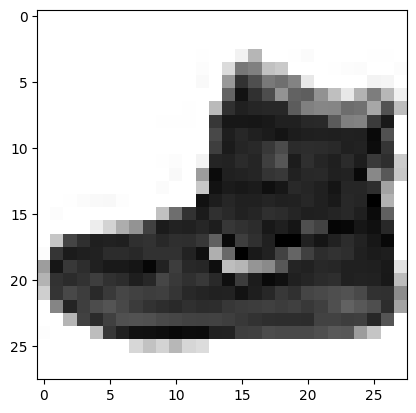

In [ ]:
plt.imshow(trainX[0], cmap=plt.cm.binary)
plt.show()

Printing the first 10 training samples of the dataset

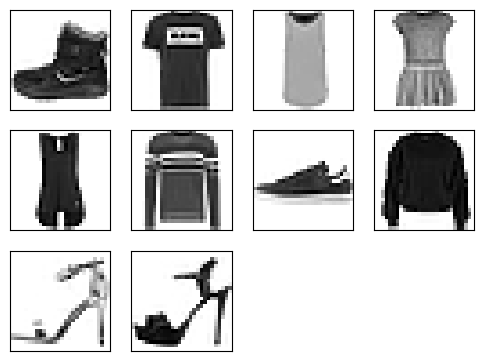

In [ ]:
numbers_to_display = 10
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(6,6))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.show()

In [ ]:

trainX_with_chanels = trainX.reshape(
    trainX.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

testX_with_chanels = testX.reshape(
    testX.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('trainX_with_chanels:', trainX_with_chanels.shape)
print('testX_with_chanels:', testX_with_chanels.shape)

trainX_with_chanels: (60000, 28, 28, 1)
testX_with_chanels: (10000, 28, 28, 1)


normalising the data

In [ ]:
trainX_normalized = trainX_with_chanels / 255
testX_normalized = testX_with_chanels / 255

Using code found from :https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide it is possible to plot the images with their classification labels.  
I display the first 20 images from the train data

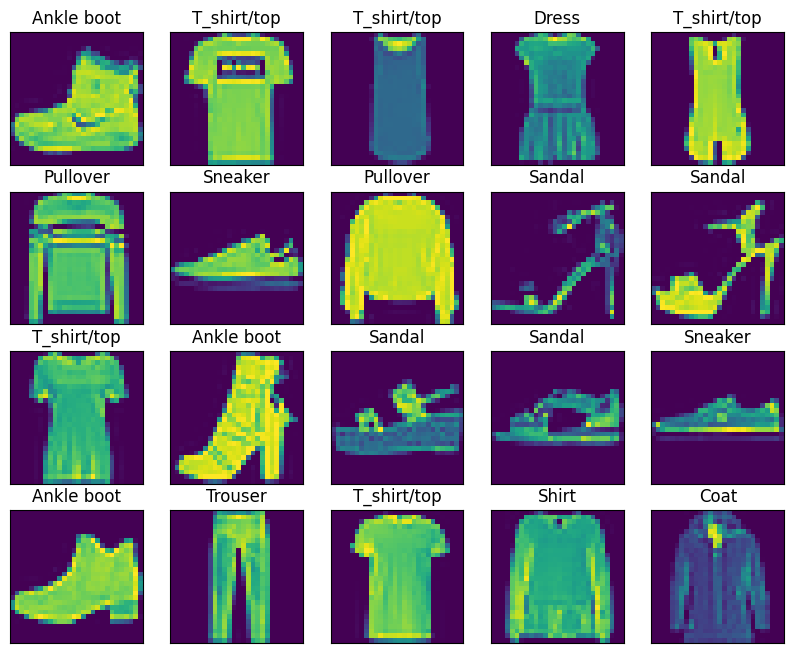

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i].reshape((28,28)))
    label_index = int(trainy[i])
    plt.title(class_names[label_index])
plt.show()

importing needed libraries

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Using a sequential cnn model with convolutional layer and max pooling.  
## change params

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')

])

In [ ]:
from tensorflow.keras.optimizers import Adam

training the model using sparse_categorical_crossentropy for the loss.  
This is used as a loss function for multi-class classification model where the output label is assigned integer value.  
Setting the learning rate to ## value

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

fitting the cnn model to the data as each epoch goes by the accuracy of the model improves

In [ ]:
history = cnn_model.fit(
    trainX,
    trainy,
    batch_size=4096,
    epochs=75,
    verbose=1)

Epoch 1/75
15/15 [==============================] - 31s 2s/step - loss: 14.4471 - accuracy: 0.2795
Epoch 2/75
15/15 [==============================] - 28s 2s/step - loss: 2.0394 - accuracy: 0.2581
Epoch 3/75
15/15 [==============================] - 28s 2s/step - loss: 1.9662 - accuracy: 0.2864
Epoch 4/75
15/15 [==============================] - 28s 2s/step - loss: 1.8838 - accuracy: 0.3269
Epoch 5/75
15/15 [==============================] - 29s 2s/step - loss: 1.7903 - accuracy: 0.3452
Epoch 6/75
15/15 [==============================] - 28s 2s/step - loss: 1.6657 - accuracy: 0.3841
Epoch 7/75
15/15 [==============================] - 28s 2s/step - loss: 1.5305 - accuracy: 0.4336
Epoch 8/75
15/15 [==============================] - 28s 2s/step - loss: 1.4048 - accuracy: 0.4516
Epoch 9/75
15/15 [==============================] - 29s 2s/step - loss: 1.2735 - accuracy: 0.4581
Epoch 10/75
15/15 [==============================] - 28s 2s/step - loss: 1.2270 - accuracy: 0.5170
Epoch 11/75
15/15 

Evaluating the model by printing its loss and accuracy score for the test data

In [ ]:
score = cnn_model.evaluate(testX,testy,verbose=0)
print('Test Loss : {:.2f}'.format(score[0]))
print('Test Accuracy : {:.2f}'.format(score[1]))

Test Loss : 0.43
Test Accuracy : 0.87


change learning rate and batch size

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.05),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(
    trainX,
    trainy,
    batch_size=100,
    epochs=75,
    verbose=1
)

Epoch 1/75
600/600 [==============================] - 24s 40ms/step - loss: 0.4080 - accuracy: 0.8608
Epoch 2/75
600/600 [==============================] - 24s 39ms/step - loss: 0.3302 - accuracy: 0.8844
Epoch 3/75
600/600 [==============================] - 23s 38ms/step - loss: 0.2984 - accuracy: 0.8924
Epoch 4/75
600/600 [==============================] - 24s 39ms/step - loss: 0.2758 - accuracy: 0.8993
Epoch 5/75
600/600 [==============================] - 24s 39ms/step - loss: 0.2575 - accuracy: 0.9050
Epoch 6/75
600/600 [==============================] - 23s 39ms/step - loss: 0.2441 - accuracy: 0.9103
Epoch 7/75
600/600 [==============================] - 24s 39ms/step - loss: 0.2352 - accuracy: 0.9133
Epoch 8/75
600/600 [==============================] - 24s 39ms/step - loss: 0.2243 - accuracy: 0.9162
Epoch 9/75
600/600 [==============================] - 24s 39ms/step - loss: 0.2186 - accuracy: 0.9194
Epoch 10/75
600/600 [==============================] - 23s 38ms/step - loss: 0.212

In [ ]:
score = cnn_model.evaluate(testX,testy,verbose=0)
print('Test Loss : {:.2f}'.format(score[0]))
print('Test Accuracy : {:.2f}'.format(score[1]))

Test Loss : 0.51
Test Accuracy : 0.90


In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.01),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(
    trainX,
    trainy,
    batch_size=100,
    epochs=75,
    verbose=1
)

Epoch 1/75
600/600 [==============================] - 24s 39ms/step - loss: 0.1310 - accuracy: 0.9520
Epoch 2/75
600/600 [==============================] - 24s 39ms/step - loss: 0.1278 - accuracy: 0.9536
Epoch 3/75
600/600 [==============================] - 24s 39ms/step - loss: 0.1242 - accuracy: 0.9549
Epoch 4/75
600/600 [==============================] - 24s 39ms/step - loss: 0.1288 - accuracy: 0.9532
Epoch 5/75
600/600 [==============================] - 24s 39ms/step - loss: 0.1254 - accuracy: 0.9543
Epoch 6/75
600/600 [==============================] - 23s 38ms/step - loss: 0.1252 - accuracy: 0.9552
Epoch 7/75
600/600 [==============================] - 23s 39ms/step - loss: 0.1283 - accuracy: 0.9540
Epoch 8/75
600/600 [==============================] - 24s 39ms/step - loss: 0.1255 - accuracy: 0.9541
Epoch 9/75
600/600 [==============================] - 24s 39ms/step - loss: 0.1243 - accuracy: 0.9552
Epoch 10/75
600/600 [==============================] - 24s 39ms/step - loss: 0.122

In [ ]:
score = cnn_model.evaluate(testX,testy,verbose=1)
print('Test Loss : {:.2f}'.format(score[0]))
print('Test Accuracy : {:.2f}'.format(score[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.6213 - accuracy: 0.8992
Test Loss : 0.62
Test Accuracy : 0.90


In [ ]:
score = cnn_model.evaluate(trainX,trainy,verbose=1)
print('Test Loss : {:.2f}'.format(score[0]))
print('Test Accuracy : {:.2f}'.format(score[1]))

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0617 - accuracy: 0.9782
Test Loss : 0.06
Test Accuracy : 0.98
